In [2]:
from nba_api.stats.endpoints import ShotChartDetail, playercareerstats
from nba_api.stats.static import players
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
import os
import utils.nba_plot_utils as pu
import importlib
from tqdm import tqdm
%matplotlib inline


In [3]:
# all of Stephen Curry's shots in the 2020-21 season
player_id = 201939  # Stephen Curry
season = '2020-21'

In [4]:
DATA_FOLDER = 'data/'

In [5]:
# pull the shot chart data
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,  # 0 indicates that we want data for all teams
    season_nullable=season,
    context_measure_simple="FGA"  # FGA indicates that we want data on field goal attempts
)

In [6]:

# convert to a DataFrame
shot_data = response.get_data_frames()[0]

In [7]:
# save as a file
file_path = os.path.join(DATA_FOLDER, f'steph_curry_full_shots_{season}.csv')

In [8]:
shot_data.to_csv(file_path, index=False)

In [9]:
print(f"Data successfully downloaded and saved as '{file_path}'")
print(shot_data['SHOT_MADE_FLAG'].unique())

Data successfully downloaded and saved as 'data/steph_curry_full_shots_2020-21.csv'
[0 1]


In [10]:
# example - steph curry shot chart and visualization
# shot_data = pd.read_csv(file_path)

In [11]:
# drop rows where the shot distance is missing
shot_data = shot_data.dropna(subset=['LOC_X', 'LOC_Y'])

In [12]:
importlib.reload(pu)

<module 'utils.nba_plot_utils' from '/Users/yoav/Documents/Yoav/CS/20936 - DS Project/Shotpred/utils/nba_plot_utils.py'>

In [13]:
shot_data.LOC_X.max()

246

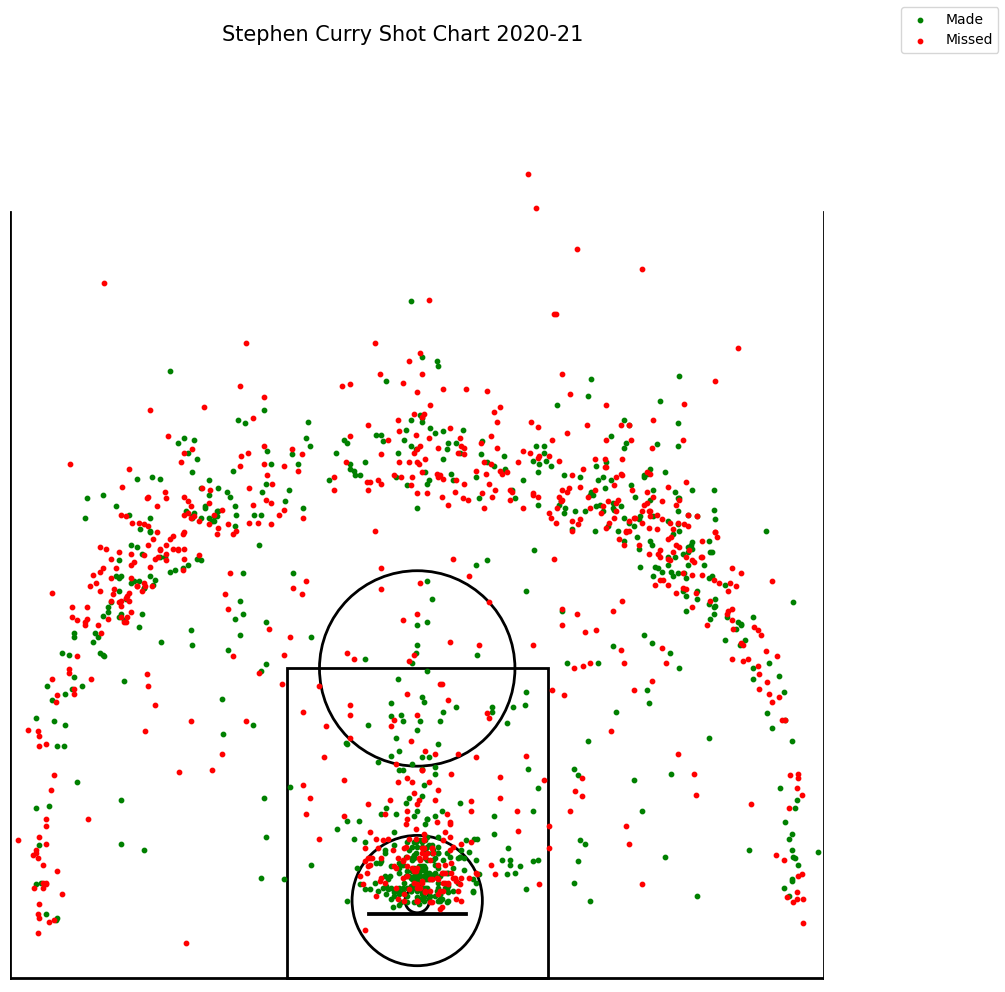

In [14]:
fin, finax = pu.plot_shot_scatter(shot_data, plot_title=f'Stephen Curry Shot Chart {season}')

In [17]:
from nba_api.stats.endpoints import playervsplayer

In [25]:
d = playervsplayer.PlayerVsPlayer(player_id=201939, vs_player_id=2544, season='2020-21', per_mode_detailed='PerGame').get_data_frames()[0]

In [26]:
d


,GROUP_SET,GROUP_VALUE,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS
0,Overall,Stephen Curry,201939,Stephen Curry,63,37,26,0.587,34.2,10.4,...,5.8,3.4,1.2,0.1,0.9,1.9,4.6,32.0,3.9,47.9
1,Overall,LeBron James,2544,LeBron James,45,30,15,0.667,33.4,9.4,...,7.8,3.7,1.1,0.6,0.6,1.6,4.6,25.0,6.4,47.0


In [27]:
pc = playercareerstats.PlayerCareerStats(player_id=201939).get_data_frames()[0]

In [29]:
pc.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [15]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
#נתנוי הזריקות של סטף קרי לאורך כל הקריירה 
#כמו הקובץ הקודם אשמח שתריץ אצלך אין לי וויפי בבסיס

# מזהה השחקן של סטף קרי
player_id = 201939

# משיכת נתוני הזריקות של סטף קרי לאורך כל הקריירה
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,  # 0 מכוון לכל הקריירה ולא לקבוצה מסוימת
    season_nullable='ALL',  # כל העונות
    context_measure_simple='FGA'  # נתוני כל הזריקות
)

# קבלת הנתונים בפורמט JSON
data = response.get_json()

# יצירת DataFrame מתוך הנתונים
shot_data = response.shot_chart_detail.get_data_frame()

# שמירת הנתונים לקובץ CSV
output_file = 'stephen_curry_shot_data.csv'
shot_data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"נתוני הזריקות של סטף קרי נשמרו בקובץ {output_file}")


נתוני הזריקות של סטף קרי נשמרו בקובץ stephen_curry_shot_data.csv


In [16]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
#נתוני הזריקות של סטף בעונת 23-24
# מזהה השחקן של סטף קרי
player_id = 201939

# ננסה לשלוף נתוני זריקות עבור עונת 2023-2024
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,
    season_nullable='2023-24',  # עונה ספציפית
    context_measure_simple='FGA'
)

# יצירת DataFrame מתוך הנתונים
shot_data = response.shot_chart_detail.get_data_frame()

# בדיקת הנתונים
if shot_data.empty:
    print("לא נמצאו נתונים גם לעונה הספציפית.")
else:
    print("נתונים נשלפו בהצלחה לעונה 2023-24.")
    print(shot_data.head())

    # שמירת הנתונים לקובץ CSV
    output_file = 'stephen_curry_shot_data_2023_24.csv'
    shot_data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"נתוני הזריקות נשמרו בקובץ {output_file}")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#ויזואליזציה של סטף 23-24
# קריאת קובץ הנתונים של 2020-21
file_path = "/Users/home/stephen_curry_shot_data_2023_24.csv"  # שים את הקובץ הנכון פה
data = pd.read_csv(file_path)

# פילטר לזריקות בלבד (לא ריקות)
data = data.dropna(subset=['LOC_X', 'LOC_Y'])

# פונקציה לציור מגרש כדורסל
def draw_court(ax=None):
    if ax is None:
        ax = plt.gca()
    # גבולות המגרש
    hoop = plt.Circle((0, 0), 7.5, linewidth=2, color="black", fill=False)
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=2, color="black")
    outer_box = plt.Rectangle((-80, -47.5), 160, 190, linewidth=2, color="black", fill=False)
    free_throw = plt.Circle((0, 142.5), 60, linewidth=2, color="black", fill=False)
    restricted = plt.Circle((0, 0), 40, linewidth=2, color="black", fill=False)

    # הוספת אלמנטים למגרש
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(outer_box)
    ax.add_patch(free_throw)
    ax.add_patch(restricted)

    # קווי המגרש
    ax.plot([-220, 220], [-47.5, -47.5], linewidth=2, color="black")  # קו תחתון
    ax.plot([-220, -220], [-47.5, 422.5], linewidth=2, color="black")  # קו שמאלי
    ax.plot([220, 220], [-47.5, 422.5], linewidth=2, color="black")  # קו ימני

    # הגדרת צירים
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 470)
    ax.set_aspect('equal')
    ax.axis('off')

# יצירת גרף עם מפת זריקות
%matplotlib inline
plt.figure(figsize=(12, 11))
ax = plt.gca()
draw_court(ax)

# ציור הזריקות: ירוק להצלחות, אדום להחטאות
made_shots = data[data['SHOT_MADE_FLAG'] == 1]
missed_shots = data[data['SHOT_MADE_FLAG'] == 0]

plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='green', label="Made", s=10)
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='red', label="Missed", s=10)

# כותרת ופרטים
plt.title("NBA Shot Chart - 2020-21 Season", fontsize=15)
plt.legend(loc='upper right')
plt.show()


In [ ]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# פונקציה לשליפת נתוני זריקות עבור עונה נתונה
def fetch_shot_data(player_id, season):
    response = ShotChartDetail(
        player_id=player_id,
        team_id=0,
        season_nullable=season,
        context_measure_simple='FGA'
    )
    return response.shot_chart_detail.get_data_frame()

# מזהה השחקן של סטף קרי
player_id = 201939

# שליפת נתוני זריקות לשתי העונות
season_2023_24 = fetch_shot_data(player_id, '2023-24')
season_2020_21 = fetch_shot_data(player_id, '2020-21')

# הוספת עמודת עונה
season_2023_24['Season'] = '2023-24'
season_2020_21['Season'] = '2020-21'

# איחוד הנתונים לשתי העונות
combined_data = pd.concat([season_2023_24, season_2020_21])

# יצירת ויזואליזציה
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=combined_data,
    x='LOC_X', y='LOC_Y',
    hue='Season',
    style='SHOT_MADE_FLAG',  # סמל שונה לפי קליעה או החטאה
    palette='coolwarm',
    alpha=0.7
)
plt.title('Steph Curry Shot Chart Comparison: 2023-24 vs 2020-21', fontsize=16)
plt.xlabel('Court X Location')
plt.ylabel('Court Y Location')
plt.legend(title='Season')
plt.axhline(0, color='black', linewidth=1)  # קו לציון הקשת
plt.grid(alpha=0.3)

# שמירת הגרף לקובץ
chart_filename = 'steph_curry_shot_chart_comparison.png'
plt.savefig(chart_filename, dpi=300, bbox_inches='tight')  # שמירת קובץ עם איכות גבוהה
print(f"הגרף נשמר בהצלחה בקובץ {chart_filename}")

# הצגת הגרף
plt.show()
